In [37]:
# Import required packages here (after they are installed)
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

from sklearn.model_selection import cross_val_score
import math

# Import model packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path
data = np.loadtxt("covid-gdpMerged.csv", skiprows = 1, usecols = (2,3,4,6,7,8,10,11), delimiter = ",")

    MODELS FOR AVERAGE DEATHS PER MILLION

In [38]:
#shuffle the data and select training and test data
# np.random.seed(100)
# np.random.shuffle(data)

features = []
labels = []

for row in data:
    features.append( row[:6])
    labels.append( row[6])
    
    
    
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing

TRAINING_PORTION = 0.4

numTrain = int(len(features)* TRAINING_PORTION)

trainFeatures = features[:numTrain] # size = 81 
testFeatures = features[numTrain:]  # size = 122
trainLabels = labels[:numTrain]
testLabels = labels[numTrain:]

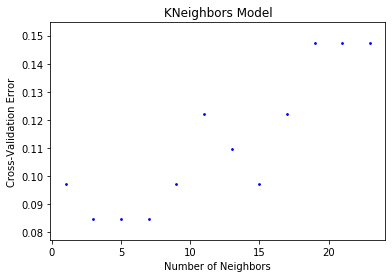

Optimal KNeighbors model a value of 3 for n_neighbors with cross validation error of 0.08472222222222214


In [39]:
#KNeighbors Classifier

# Run the KNeigbors Classifier on the COVID dataset 
# using models of different k-nearest neighbor sizes
# to find the optimal KNeighbors model for the dataset

kneighborsNumNeighbors = range( 1, 25, 2)
kneighborsCrossVals = []


for numNeighbors in kneighborsNumNeighbors:
    model = KNeighborsClassifier( n_neighbors = numNeighbors)
    kneighborsCrossVals.append( 1 - np.average( cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    
    
    
#plot the points
mp.scatter( kneighborsNumNeighbors, kneighborsCrossVals, s=3, c="b")

#specify the axes
# mp.xlim(0,50)
mp.xlabel("Number of Neighbors")
# mp.ylim(0,0.05)
mp.ylabel("Cross-Validation Error")

#label the figure
mp.title("KNeighbors Model")

#display the current graph
show()

optimalNeighbors = kneighborsNumNeighbors[ np.argmin( kneighborsCrossVals)]
print( "Optimal KNeighbors model a value of", optimalNeighbors, "for n_neighbors with cross validation error of", np.min( kneighborsCrossVals))
    

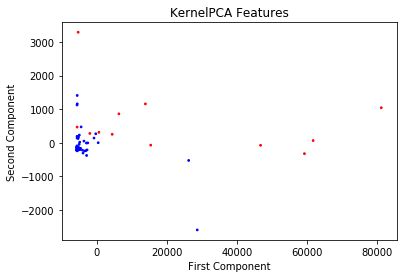

In [40]:
#KernelPCA

# Run the KernalPCA on the COVID dataset and visualize
# the results to observe whether there are certain
# features that nicely separate the data

model = KernelPCA( n_components=2, kernel='poly', degree=1)
newFeatures = model.fit_transform( trainFeatures, trainLabels)

X = []
Y = []
kpcaTrain = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    kpcaTrain.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])

    if ( trainLabels[ index] == 0):
        colors.append("b")
    else:
        colors.append("r")
    
    
#plot the data points
mp.scatter(X, Y, s = 3, c = colors)

#specify the axes
# mp.xlim(-1,1) 
mp.xlabel("First Component") 
# mp.ylim(-1,1) 
mp.ylabel("Second Component")
#label the figure
mp.title("KernelPCA Features")
#display the current graph
show()


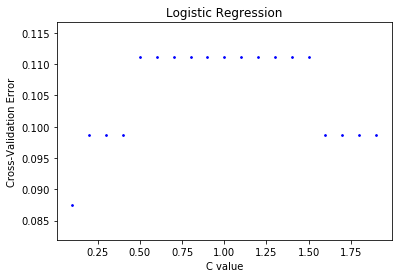

In [41]:
#LogisticRegression

# Run the LogisticRegression model on the KernelPCA extracted features
# from the COVID dataset using different c values to find the optimal
# LogisticRegression model for the dataset

logisticRegressionStrength = []
for i in range( 1, 20):
    logisticRegressionStrength.append( i/10)

logisticRegressionCrossVals = []

for i in logisticRegressionStrength:
    model = LogisticRegression( C = i, solver = "liblinear")
    logisticRegressionCrossVals.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

    
    
#plot the data points
mp.scatter( logisticRegressionStrength, logisticRegressionCrossVals, s = 3, c = "blue")

#specify the axes
# mp.xlim(-1,1) 
mp.xlabel("C value") 
# mp.ylim(-1,1) 
mp.ylabel("Cross-Validation Error")
#label the figure
mp.title("Logistic Regression")
#display the current graph
show()

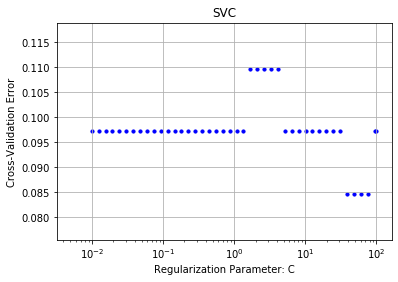

Lowest Cross-Validation Error = 0.08472222222222223 at c = 38.518598887744716


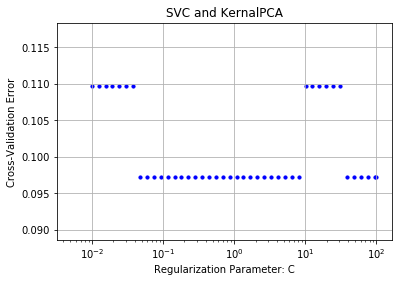

Lowest Cross-Validation Error = 0.09722222222222222 at c = 0.0476837158203125


In [42]:
#SVM

# Run the SVC model on the features extracted from the KernelPCA
# and use cross_val_score to determine how effectively the data
# was separated in the kpcaTrain model

svcRegularization = []
for i in range( 1, 43):
    svcRegularization.append( np.power( 1.25, i) / 125)
svcRegularization.append( 100)

svcCrossVals = []
svcCrossValsKPCA = []

for i in svcRegularization:
    model = SVC( kernel = "poly", C = i)
    svcCrossVals.append( np.average( 1 - cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    svcCrossValsKPCA.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))
    

#plot the points
mp.scatter( svcRegularization, svcCrossVals, s=10, c="b")

#specify the axes
mp.xlabel("Regularization Parameter: C")
mp.ylabel("Cross-Validation Error")

mp.xscale("log")
mp.grid()

#label the figure
mp.title("SVC")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( svcCrossVals), "at c =", svcRegularization[ np.argmin( svcCrossVals)])

#plot the points
mp.scatter( svcRegularization, svcCrossValsKPCA, s=10, c="b")

#specify the axes
mp.xlabel("Regularization Parameter: C")
mp.ylabel("Cross-Validation Error")

mp.xscale("log")
mp.grid()

#label the figure
mp.title("SVC and KernalPCA")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( svcCrossValsKPCA), "at c =", svcRegularization[ np.argmin( svcCrossValsKPCA)])

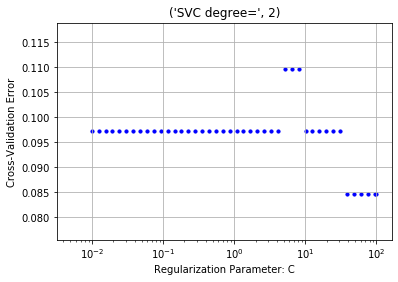

Minimal Cross-Validation Error with kernel degree = 2 is at c = 38.518598887744716
Cross-Validation Error = 0.08472222222222223


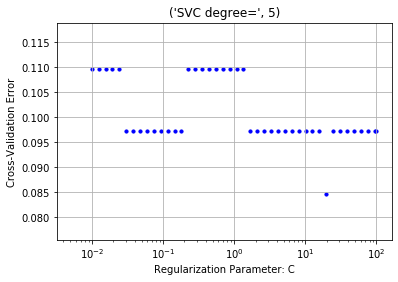

Minimal Cross-Validation Error with kernel degree = 5 is at c = 19.721522630525296
Cross-Validation Error = 0.08472222222222223


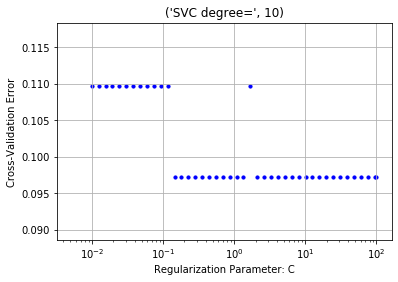

Minimal Cross-Validation Error with kernel degree = 10 is at c = 0.14551915228366852
Cross-Validation Error = 0.09722222222222222


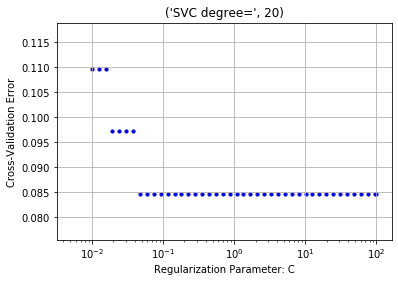

Minimal Cross-Validation Error with kernel degree = 20 is at c = 0.0476837158203125
Cross-Validation Error = 0.08472222222222223


In [43]:
cross_val_scores = [[],[],[],[]]

degrees = [2, 5, 10, 20]

for x in range( len( degrees)):
    for i in svcRegularization:
        model = SVC( C = i, kernel = "poly", degree = degrees[ x])
        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    
for i in range( len( degrees)):
    #plot the points
    mp.scatter( svcRegularization, cross_val_scores[ i], s=10, c="b")

    #specify the axes
    mp.xlabel("Regularization Parameter: C")
    mp.ylabel("Cross-Validation Error")

    mp.xscale("log")
    mp.grid()

    #label the figure
    title = "SVC degree=", degrees[ i]
    mp.title(title)

    #display the current graph
    show()
    print( "Minimal Cross-Validation Error with kernel degree =", degrees[ i], "is at c =", svcRegularization[ np.argmin( cross_val_scores[ i])])
    print( "Cross-Validation Error =", np.min( cross_val_scores[ i]))

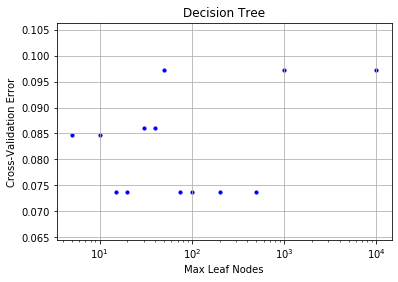

Lowest Cross-Validation Error = 0.07361111111111111 at max_leaf_nodes = 15


In [44]:
maxLeafNodes = [5,10,15,20,30,40,50,75,100,200,500,1000,10000]
decisionTreeCrossVals = []

for i in maxLeafNodes:
    model = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i)
    decisionTreeCrossVals.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

#plot the points
mp.scatter(maxLeafNodes,decisionTreeCrossVals,s=10,c="b")

#specify the axes
mp.xlabel("Max Leaf Nodes")
mp.ylabel("Cross-Validation Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Decision Tree")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( decisionTreeCrossVals), "at max_leaf_nodes =", maxLeafNodes[ np.argmin( decisionTreeCrossVals)])

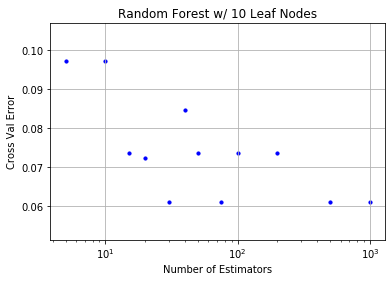

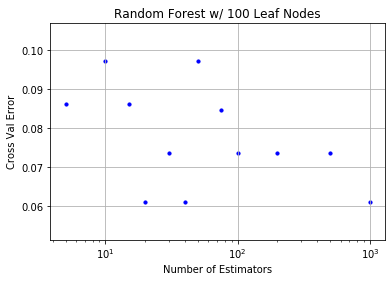

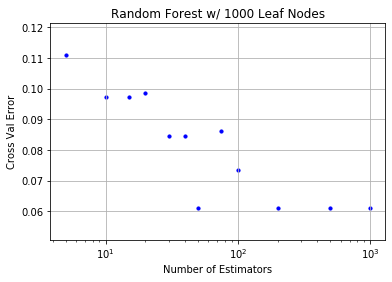

In [45]:
from sklearn.ensemble import RandomForestClassifier

maxLeafNodes = [10, 100, 1000]
numEstimators = [5,10,15,20,30,40,50,75,100,200,500,1000]

errors = [ [], [], [] ]

i = 0
for nNodes in maxLeafNodes:
    for nEstimators in numEstimators:
        model = RandomForestClassifier( n_estimators = nEstimators, max_leaf_nodes = nNodes, n_jobs = -1)
        errors[i].append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))
    i+=1
    
    
#plot the points
mp.scatter(numEstimators,errors[0],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 10 Leaf Nodes")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[1],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 100 Leaf Nodes")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[2],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 1000 Leaf Nodes")

#display the current graph
show()

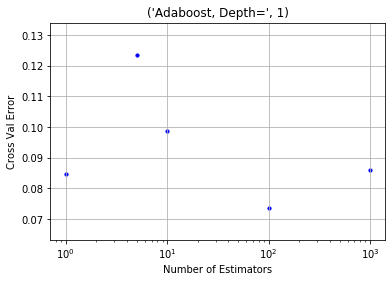

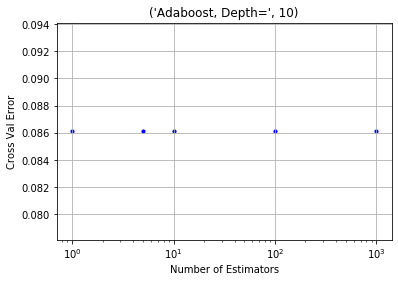

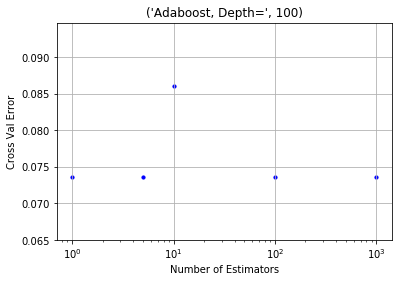

In [46]:
numEstimators = [1,5,10,100,1000]
maxDepths = [1, 10, 100]

for maxDepth in maxDepths:
    errors = []
    for i in numEstimators:
        model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = maxDepth), n_estimators = i)
        errors.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

    #plot the points
    mp.scatter(numEstimators,errors,s=10,c="b")

    #specify the axes
    mp.xlabel("Number of Estimators")
    mp.ylabel("Cross Val Error")

    mp.grid()
    mp.xscale("log")

    #label the figure
    title = "Adaboost, Depth=", maxDepth
    mp.title(title)

    #display the current graph
    show()


In [47]:
# Build simpleTest to test the optimal models

model = KernelPCA( n_components=2, kernel='poly', degree=1)
newFeatures = model.fit_transform( testFeatures, testLabels)

X = []
Y = []
simpleTest = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    simpleTest.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])


In [48]:
kNeighborsModel = KNeighborsClassifier( n_neighbors = optimalNeighbors)
logisticRegressionModel = LogisticRegression( C = 0.1, solver = "liblinear")
svmModel = SVC( kernel = "poly", C = svcRegularization[ np.argmin( svcCrossValsKPCA)])
decisionTreeModel = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 15)
randomForestModel = RandomForestClassifier( n_estimators = 20, max_leaf_nodes = 100, n_jobs = -1)
adaBoostModel = model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 10), n_estimators = 10)

kNeighborsModel.fit( kpcaTrain, trainLabels)
logisticRegressionModel.fit( kpcaTrain, trainLabels)
svmModel.fit( kpcaTrain, trainLabels)
decisionTreeModel.fit( kpcaTrain, trainLabels)
randomForestModel.fit( kpcaTrain, trainLabels)
adaBoostModel.fit( kpcaTrain, trainLabels)

models = [ "K-Neighbors", "Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "AdaBoost"]
errors = []
errors.append( 1 - kNeighborsModel.score( simpleTest, testLabels))
errors.append( 1 - logisticRegressionModel.score( simpleTest, testLabels))
errors.append( 1 - svmModel.score( simpleTest, testLabels))
errors.append( 1 - decisionTreeModel.score( simpleTest, testLabels))
errors.append( 1 - randomForestModel.score( simpleTest, testLabels))
errors.append( 1 - adaBoostModel.score( simpleTest, testLabels))

In [49]:
confidences = [0.75, 0.95, 0.99]

for i in range( len( confidences)):
    print( "Markov Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", 1 - errors[ j] / ( 1 - confidences[ i]))
    print()
print()

    
for i in range( len( confidences)):
    print( "Chebyshev Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", errors[ j], "+-", math.sqrt( 1/( 4*len( testLabels)*( 1 - confidences[ i]))))
    print()
print()


for i in range( len( confidences)):
    print( "Hoeffding Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", errors[ j], "+-", math.sqrt( math.log( 1 - confidences[ i])/( -2*len( testLabels))))
    print()
print()

Markov Bound at 75.0 %
	 K-Neighbors Bound: 0.540983606557377
	 Logistic Regression Bound: 0.6065573770491803
	 Support Vector Machine Bound: 0.540983606557377
	 Decision Tree Bound: 0.6065573770491803
	 Random Forest Bound: 0.639344262295082
	 AdaBoost Bound: 0.6065573770491803

Markov Bound at 95.0 %
	 K-Neighbors Bound: -1.2950819672131129
	 Logistic Regression Bound: -0.9672131147540965
	 Support Vector Machine Bound: -1.2950819672131129
	 Decision Tree Bound: -0.9672131147540965
	 Random Forest Bound: -0.8032786885245884
	 AdaBoost Bound: -0.9672131147540965

Markov Bound at 99.0 %
	 K-Neighbors Bound: -10.475409836065566
	 Logistic Regression Bound: -8.836065573770483
	 Support Vector Machine Bound: -10.475409836065566
	 Decision Tree Bound: -8.836065573770483
	 Random Forest Bound: -8.016393442622942
	 AdaBoost Bound: -8.836065573770483


Chebyshev Bound at 75.0 %
	 K-Neighbors Bound: 0.11475409836065575 +- 0.09053574604251853
	 Logistic Regression Bound: 0.09836065573770492 +- 

    MODELS FOR MEDIAN DEATHS PER MILLION

In [50]:
#shuffle the data and select training and test data
# np.random.seed(100)
# np.random.shuffle(data)

features = []
labels = []

for row in data:
    features.append( row[:6])
    labels.append( row[7])
    
    
    
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing

TRAINING_PORTION = 0.4

numTrain = int(len(features)* TRAINING_PORTION)

trainFeatures = features[:numTrain] # size = 81 
testFeatures = features[numTrain:]  # size = 122
trainLabels = labels[:numTrain]
testLabels = labels[numTrain:]

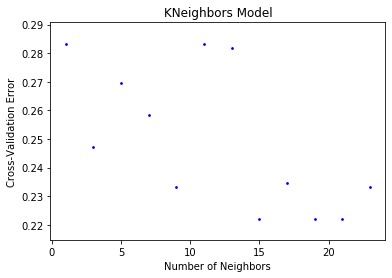

Optimal KNeighbors model a value of 15 for n_neighbors with cross validation error of 0.2222222222222222


In [51]:
#KNeighbors Classifier

# Run the KNeigbors Classifier on the COVID dataset 
# using models of different k-nearest neighbor sizes
# to find the optimal KNeighbors model for the dataset

kneighborsNumNeighbors = range( 1, 25, 2)
kneighborsCrossVals = []


for numNeighbors in kneighborsNumNeighbors:
    model = KNeighborsClassifier( n_neighbors = numNeighbors)
    kneighborsCrossVals.append( 1 - np.average( cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    
    
    
#plot the points
mp.scatter( kneighborsNumNeighbors, kneighborsCrossVals, s=3, c="b")

#specify the axes
# mp.xlim(0,50)
mp.xlabel("Number of Neighbors")
# mp.ylim(0,0.05)
mp.ylabel("Cross-Validation Error")

#label the figure
mp.title("KNeighbors Model")

#display the current graph
show()

optimalNeighbors = kneighborsNumNeighbors[ np.argmin( kneighborsCrossVals)]
print( "Optimal KNeighbors model a value of", optimalNeighbors, "for n_neighbors with cross validation error of", np.min( kneighborsCrossVals))
    

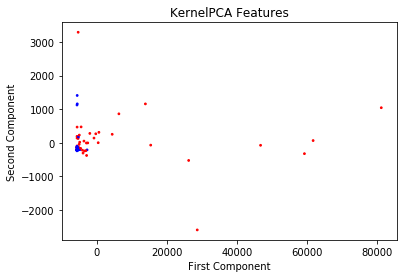

In [52]:
#KernelPCA

# Run the KernalPCA on the COVID dataset and visualize
# the results to observe whether there are certain
# features that nicely separate the data

model = KernelPCA( n_components=2, kernel='poly', degree=1)
newFeatures = model.fit_transform( trainFeatures, trainLabels)

X = []
Y = []
kpcaTrain = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    kpcaTrain.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])

    if ( trainLabels[ index] == 0):
        colors.append("b")
    else:
        colors.append("r")
    
    
#plot the data points
mp.scatter(X, Y, s = 3, c = colors)

#specify the axes
# mp.xlim(-1,1) 
mp.xlabel("First Component") 
# mp.ylim(-1,1) 
mp.ylabel("Second Component")
#label the figure
mp.title("KernelPCA Features")
#display the current graph
show()



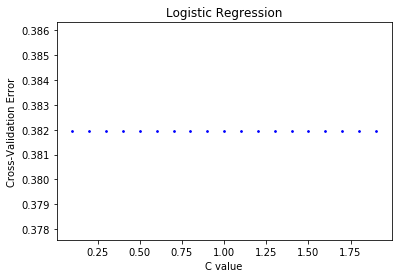

In [53]:
#LogisticRegression

# Run the LogisticRegression model on the KernelPCA extracted features
# from the COVID dataset using different c values to find the optimal
# LogisticRegression model for the dataset

logisticRegressionStrength = []
for i in range( 1, 20):
    logisticRegressionStrength.append( i/10)

logisticRegressionCrossVals = []

for i in logisticRegressionStrength:
    model = LogisticRegression( C = i, solver = "liblinear")
    logisticRegressionCrossVals.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

    
    
#plot the data points
mp.scatter( logisticRegressionStrength, logisticRegressionCrossVals, s = 3, c = "blue")

#specify the axes
# mp.xlim(-1,1) 
mp.xlabel("C value") 
# mp.ylim(-1,1) 
mp.ylabel("Cross-Validation Error")
#label the figure
mp.title("Logistic Regression")
#display the current graph
show()

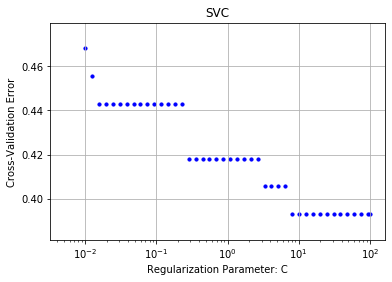

Lowest Cross-Validation Error = 0.39305555555555555 at c = 8.07793566946316


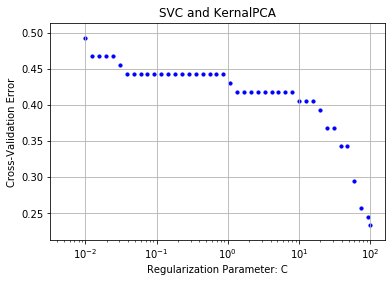

Lowest Cross-Validation Error = 0.23333333333333334 at c = 100


In [54]:
#SVM

# Run the SVC model on the features extracted from the KernelPCA
# and use cross_val_score to determine how effectively the data
# was separated in the kpcaTrain model

svcRegularization = []
for i in range( 1, 43):
    svcRegularization.append( np.power( 1.25, i) / 125)
svcRegularization.append( 100)

svcCrossVals = []
svcCrossValsKPCA = []

for i in svcRegularization:
    model = SVC( kernel = "poly", C = i)
    svcCrossVals.append( np.average( 1 - cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    svcCrossValsKPCA.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))
    

#plot the points
mp.scatter( svcRegularization, svcCrossVals, s=10, c="b")

#specify the axes
mp.xlabel("Regularization Parameter: C")
mp.ylabel("Cross-Validation Error")

mp.xscale("log")
mp.grid()

#label the figure
mp.title("SVC")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( svcCrossVals), "at c =", svcRegularization[ np.argmin( svcCrossVals)])

#plot the points
mp.scatter( svcRegularization, svcCrossValsKPCA, s=10, c="b")

#specify the axes
mp.xlabel("Regularization Parameter: C")
mp.ylabel("Cross-Validation Error")

mp.xscale("log")
mp.grid()

#label the figure
mp.title("SVC and KernalPCA")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( svcCrossValsKPCA), "at c =", svcRegularization[ np.argmin( svcCrossValsKPCA)])

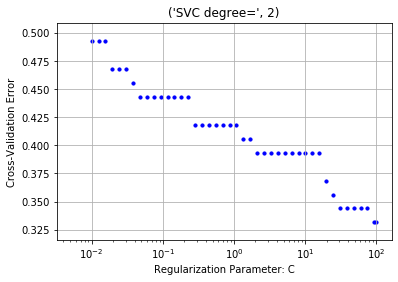

Minimal Cross-Validation Error with kernel degree = 2 is at c = 94.03954806578301
Cross-Validation Error = 0.3319444444444445


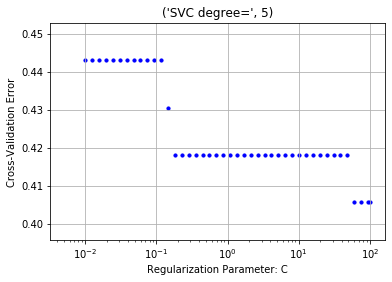

Minimal Cross-Validation Error with kernel degree = 5 is at c = 60.185310762101125
Cross-Validation Error = 0.40555555555555556


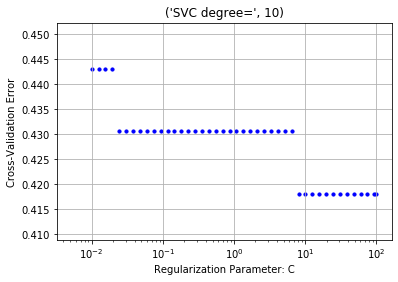

Minimal Cross-Validation Error with kernel degree = 10 is at c = 8.07793566946316
Cross-Validation Error = 0.4180555555555555


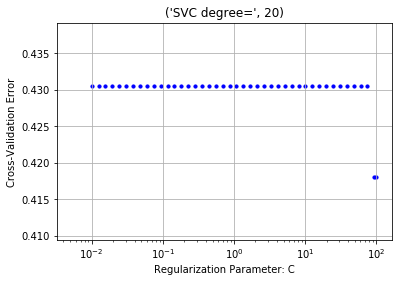

Minimal Cross-Validation Error with kernel degree = 20 is at c = 94.03954806578301
Cross-Validation Error = 0.4180555555555555


In [55]:
cross_val_scores = [[],[],[],[]]

degrees = [2, 5, 10, 20]

for x in range( len( degrees)):
    for i in svcRegularization:
        model = SVC( C = i, kernel = "poly", degree = degrees[ x])
        cross_val_scores[ x].append( np.average(1 - cross_val_score( model, trainFeatures, trainLabels, cv = 10)))
    
for i in range( len( degrees)):
    #plot the points
    mp.scatter( svcRegularization, cross_val_scores[ i], s=10, c="b")

    #specify the axes
    mp.xlabel("Regularization Parameter: C")
    mp.ylabel("Cross-Validation Error")

    mp.xscale("log")
    mp.grid()

    #label the figure
    title = "SVC degree=", degrees[ i]
    mp.title(title)

    #display the current graph
    show()
    print( "Minimal Cross-Validation Error with kernel degree =", degrees[ i], "is at c =", svcRegularization[ np.argmin( cross_val_scores[ i])])
    print( "Cross-Validation Error =", np.min( cross_val_scores[ i]))

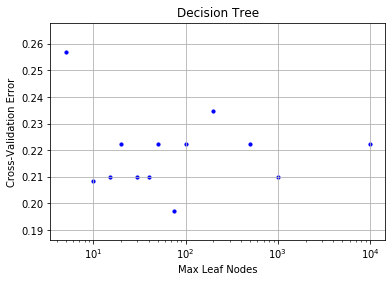

Lowest Cross-Validation Error = 0.19722222222222224 at max_leaf_nodes = 75


In [56]:
maxLeafNodes = [5,10,15,20,30,40,50,75,100,200,500,1000,10000]
decisionTreeCrossVals = []

for i in maxLeafNodes:
    model = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i)
    decisionTreeCrossVals.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

#plot the points
mp.scatter(maxLeafNodes,decisionTreeCrossVals,s=10,c="b")

#specify the axes
mp.xlabel("Max Leaf Nodes")
mp.ylabel("Cross-Validation Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Decision Tree")

#display the current graph
show()

print( "Lowest Cross-Validation Error =", np.min( decisionTreeCrossVals), "at max_leaf_nodes =", maxLeafNodes[ np.argmin( decisionTreeCrossVals)])

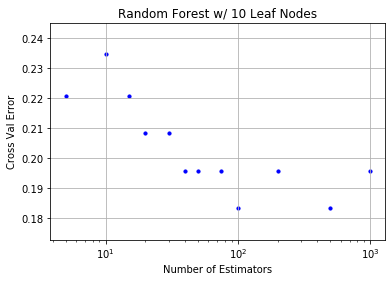

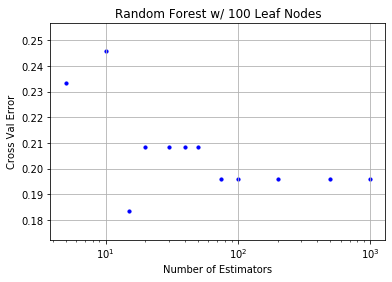

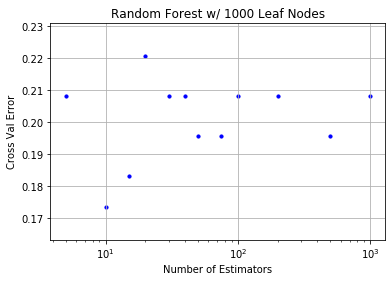

In [57]:
from sklearn.ensemble import RandomForestClassifier

maxLeafNodes = [10, 100, 1000]
numEstimators = [5,10,15,20,30,40,50,75,100,200,500,1000]

errors = [ [], [], [] ]

i = 0
for nNodes in maxLeafNodes:
    for nEstimators in numEstimators:
        model = RandomForestClassifier( n_estimators = nEstimators, max_leaf_nodes = nNodes, n_jobs = -1)
        errors[i].append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))
    i+=1
    
    
#plot the points
mp.scatter(numEstimators,errors[0],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 10 Leaf Nodes")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[1],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 100 Leaf Nodes")

#display the current graph
show()


#plot the points
mp.scatter(numEstimators,errors[2],s=10,c="b")

#specify the axes
mp.xlabel("Number of Estimators")
mp.ylabel("Cross Val Error")

mp.grid()
mp.xscale("log")

#label the figure
mp.title("Random Forest w/ 1000 Leaf Nodes")

#display the current graph
show()

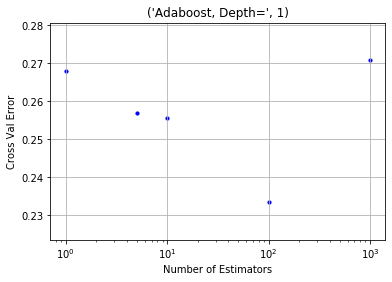

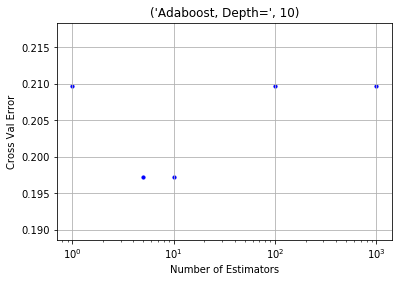

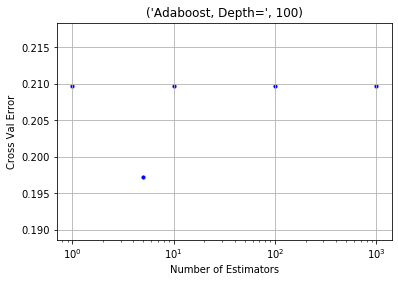

In [58]:
numEstimators = [1,5,10,100,1000]
maxDepths = [1, 10, 100]

for maxDepth in maxDepths:
    errors = []
    for i in numEstimators:
        model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = maxDepth), n_estimators = i)
        errors.append( np.average( 1 - cross_val_score( model, kpcaTrain, trainLabels, cv = 10)))

    #plot the points
    mp.scatter(numEstimators,errors,s=10,c="b")

    #specify the axes
    mp.xlabel("Number of Estimators")
    mp.ylabel("Cross Val Error")

    mp.grid()
    mp.xscale("log")

    #label the figure
    title = "Adaboost, Depth=", maxDepth
    mp.title(title)

    #display the current graph
    show()



In [59]:
# Build simpleTest to test the optimal models

model = KernelPCA( n_components=2, kernel='poly', degree=1)
newFeatures = model.fit_transform( testFeatures, testLabels)

X = []
Y = []
simpleTest = []

colors = []

for index in range( len( newFeatures)):
    X.append( newFeatures[ index][ 0])
    Y.append( newFeatures[ index][ 1])
    simpleTest.append( [ newFeatures[ index][ 0], newFeatures[ index][1]])



In [60]:
kNeighborsModel = KNeighborsClassifier( n_neighbors = optimalNeighbors)
logisticRegressionModel = LogisticRegression( C = 0.1, solver = "liblinear")
svmModel = SVC( kernel = "poly", C = svcRegularization[ np.argmin( svcCrossValsKPCA)])
decisionTreeModel = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 75)
randomForestModel = RandomForestClassifier( n_estimators = 10, max_leaf_nodes = 1000, n_jobs = -1)
adaBoostModel = model = AdaBoostClassifier( base_estimator = DecisionTreeClassifier( max_depth = 10), n_estimators = 10)

kNeighborsModel.fit( kpcaTrain, trainLabels)
logisticRegressionModel.fit( kpcaTrain, trainLabels)
svmModel.fit( kpcaTrain, trainLabels)
decisionTreeModel.fit( kpcaTrain, trainLabels)
randomForestModel.fit( kpcaTrain, trainLabels)
adaBoostModel.fit( kpcaTrain, trainLabels)

models = [ "K-Neighbors", "Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "AdaBoost"]
errors = []
errors.append( 1 - kNeighborsModel.score( simpleTest, testLabels))
errors.append( 1 - logisticRegressionModel.score( simpleTest, testLabels))
errors.append( 1 - svmModel.score( simpleTest, testLabels))
errors.append( 1 - decisionTreeModel.score( simpleTest, testLabels))
errors.append( 1 - randomForestModel.score( simpleTest, testLabels))
errors.append( 1 - adaBoostModel.score( simpleTest, testLabels))

In [61]:
confidences = [0.75, 0.95, 0.99]

for i in range( len( confidences)):
    print( "Markov Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", 1 - errors[ j] / ( 1 - confidences[ i]))
    print()
print()

    
for i in range( len( confidences)):
    print( "Chebyshev Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", errors[ j], "+-", math.sqrt( 1/( 4*len( testLabels)*( 1 - confidences[ i]))))
    print()
print()


for i in range( len( confidences)):
    print( "Hoeffding Bound at", confidences[ i] * 100, "%")
    
    for j in range( len( models)):
        print( "\t", models[ j], "Bound:", errors[ j], "+-", math.sqrt( math.log( 1 - confidences[ i])/( -2*len( testLabels))))
    print()
print()

Markov Bound at 75.0 %
	 K-Neighbors Bound: -0.14754098360655732
	 Logistic Regression Bound: -0.540983606557377
	 Support Vector Machine Bound: -0.3114754098360657
	 Decision Tree Bound: -0.5737704918032787
	 Random Forest Bound: -0.21311475409836067
	 AdaBoost Bound: -0.540983606557377

Markov Bound at 95.0 %
	 K-Neighbors Bound: -4.737704918032781
	 Logistic Regression Bound: -6.704918032786878
	 Support Vector Machine Bound: -5.557377049180323
	 Decision Tree Bound: -6.868852459016386
	 Random Forest Bound: -5.065573770491798
	 AdaBoost Bound: -6.704918032786878

Markov Bound at 99.0 %
	 K-Neighbors Bound: -27.688524590163908
	 Logistic Regression Bound: -37.52459016393439
	 Support Vector Machine Bound: -31.786885245901615
	 Decision Tree Bound: -38.34426229508193
	 Random Forest Bound: -29.32786885245899
	 AdaBoost Bound: -37.52459016393439


Chebyshev Bound at 75.0 %
	 K-Neighbors Bound: 0.28688524590163933 +- 0.09053574604251853
	 Logistic Regression Bound: 0.38524590163934425 